In [2]:
# importando bibliotecas        
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
# importando dados
dataset = pd.read_csv('Churn.csv', sep=";")
# vizualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# tamanho
dataset.shape

(999, 12)

In [5]:
# primeiro prblema: Dar nome as colunas
dataset.columns = ["ID", "Score", "Estado", "Gênero", "Idade", "Patrimônio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salário", "Saiu"]

In [6]:
# vizualizar
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
# Explorar dados categóricos
# Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

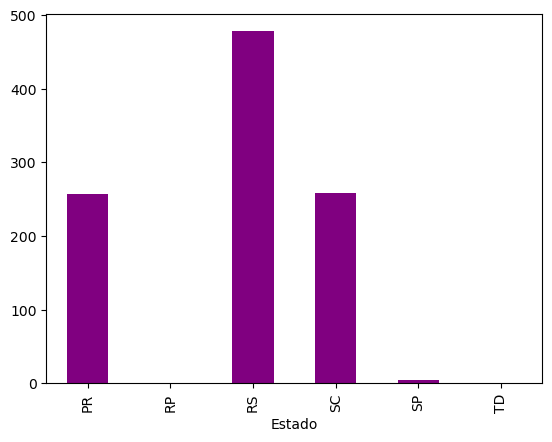

In [8]:
agrupado.plot.bar(color = 'purple')

In [9]:
# Gênero
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

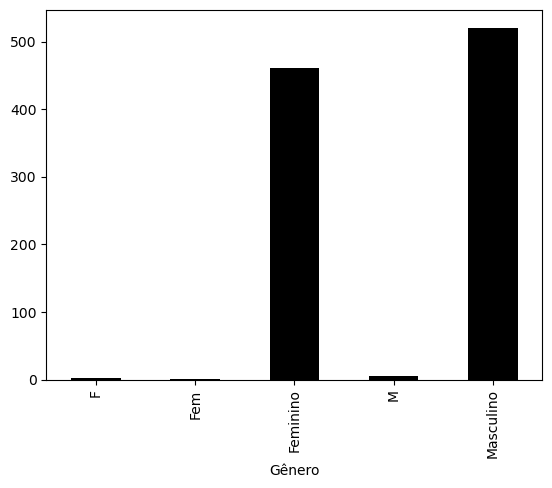

In [10]:
agrupado.plot.bar(color= 'black')

In [11]:
# Explorar colunas numéricas
# score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

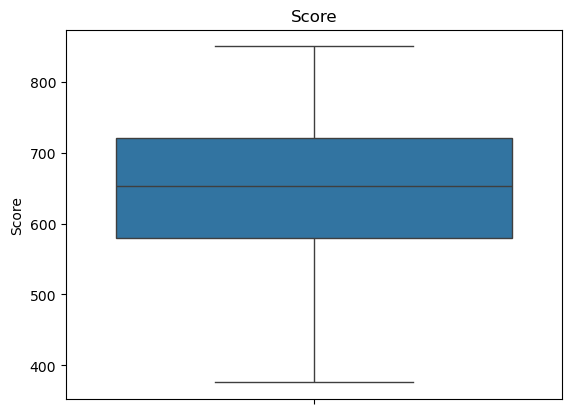

In [12]:
srn.boxplot(dataset['Score']).set_title("Score")

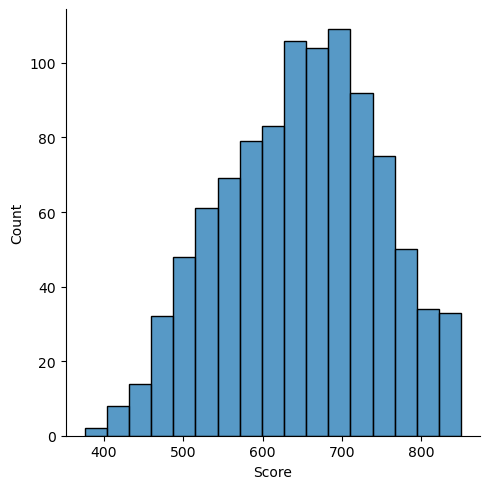

In [13]:
srn.displot(dataset['Score']).set_titles('Score')

In [14]:
# idade
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

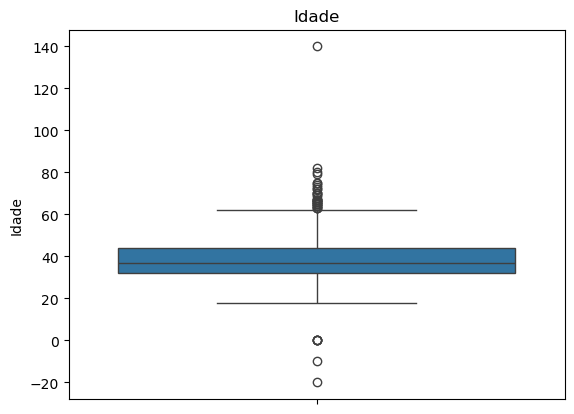

In [15]:
srn.boxplot(dataset['Idade']).set_title('Idade')

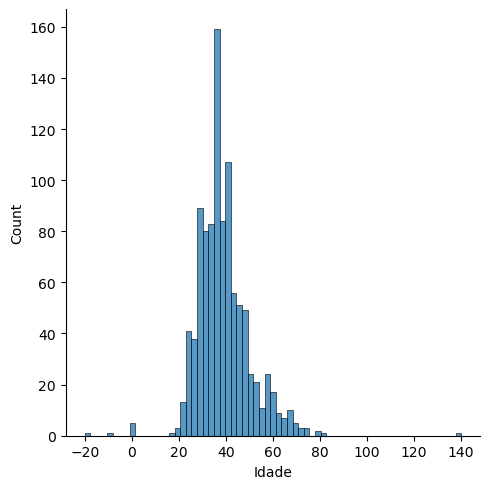

In [16]:
srn.displot(dataset["Idade"]).set_titles('Idade')

In [17]:
# saldo
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

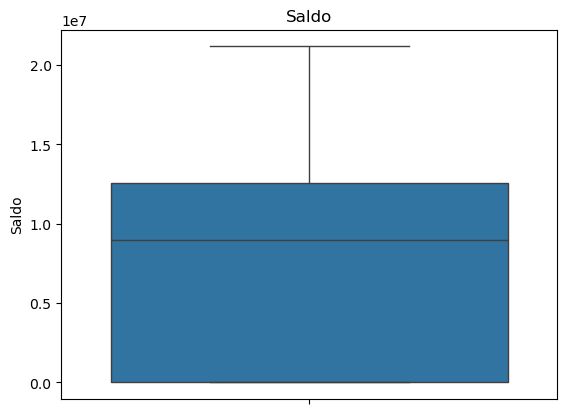

In [18]:
srn.boxplot(dataset["Saldo"]).set_title('Saldo')

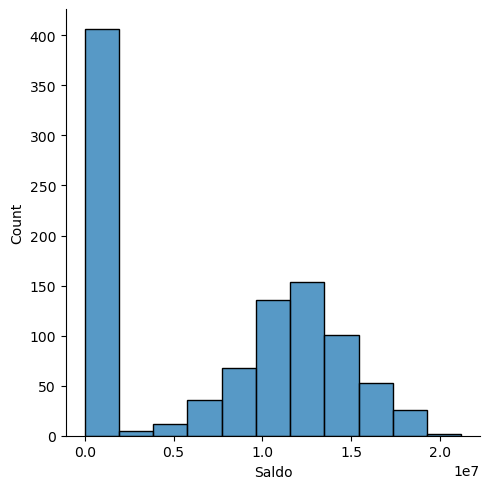

In [19]:
srn.displot(dataset['Saldo']).set_titles('Saldo')

In [20]:
# Salário
dataset["Salário"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

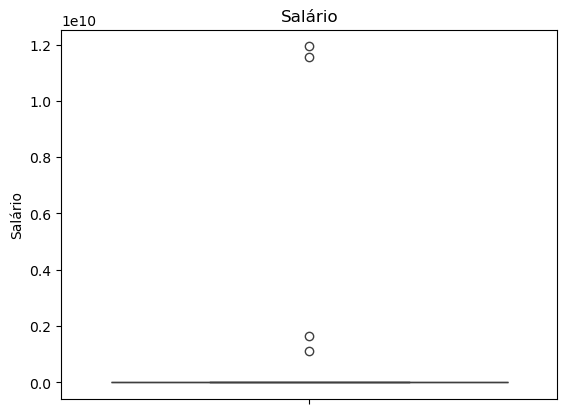

In [21]:
srn.boxplot(dataset["Salário"]).set_title("Salário")

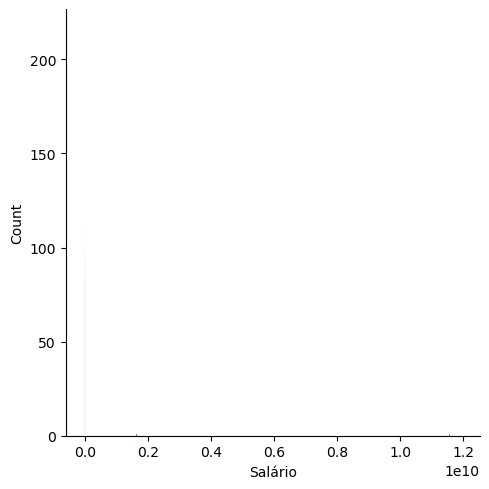

In [22]:
srn.displot(dataset["Salário"]).set_titles("Salarios")

In [23]:
# Contando valores NaN
# Gênero e Salário
dataset.isnull().sum()

ID                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [25]:
# Salários
# Remover  nas e substituir
dataset["Salário"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [28]:
mediana = sts.median(dataset['Salário'])
mediana

70518.0

In [32]:
# Substituir NAN por mediana
dataset.fillna({"Salário": mediana}, inplace=True)

In [34]:
dataset["Salário"].isnull().sum()

np.int64(0)

In [36]:
# Gênero, falta de padronização e NaN
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [37]:
#total NAS
dataset["Gênero"].isnull().sum()

np.int64(8)

In [38]:
# Preencher NAs com masculino (moda)
dataset["Gênero"].fillna('Masculino', inplace=True)

In [40]:
dataset["Gênero"].isnull().sum()

np.int64(0)

In [42]:
# Padronização
dataset.loc[dataset["Gênero"] == 'M', "Gênero"] = "Masculino"
dataset.loc[dataset["Gênero"].isin(["Fem","F"]), "Gênero"] = "Feminino"

#Visualizar reesultado
agrupado = dataset.groupby(["Gênero"]).size()
agrupado

Gênero
Feminino     464
Masculino    535
dtype: int64

In [45]:
# Idades fora do domínio
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [47]:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [49]:
# Calcular Mediana
mediana = sts.median(dataset["Idade"])
mediana

37

In [ ]:
#Substituindo
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120), "Idade"] = mediana

In [52]:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [53]:
# dados duplicados, buscamos por ID
dataset[dataset.duplicated(["ID"], keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [56]:
# Excluindo por ID
dataset.drop_duplicates(subset="ID", keep="first", inplace=True)
# Buscando duplicados
dataset[dataset.duplicated(["ID"], keep=False)]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [58]:
# Estados fora do domínio
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [59]:
#Atribuimos a moda (RS)
dataset.loc[dataset["Estado"].isin(['RP','SP','TD']), "Estado"] = "RS"
agrupado = dataset.groupby(["Estado"]).size()

In [61]:
#Verificando
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [62]:
# Outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset["Salário"])
desv

528988918.4679201

In [63]:
# Definir padrão como maior que 2 desvios padrão
# Checamos se algum atende critério
dataset.loc[dataset["Salário"] >= 2*desv]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [64]:
# Vamos atualizar os salários pela mediana
mediana = sts.median(dataset["Salário"])
mediana

8637195.5

In [65]:
# atribuimos
dataset.loc[dataset["Salário"] >= 2*desv, "Salário"] = mediana
#Checamos se algum atende o critério
dataset.loc[dataset["Salário"] >= 2*desv]

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [66]:
dataset.head()

,ID,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [67]:
dataset.shape

(998, 12)